In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter

In [3]:
batteries = pd.read_csv('batteries.csv',header=None)
sat = pd.read_csv('sat.csv')
mpg = pd.read_csv('mpg.csv')

In [4]:
batteries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


In [5]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     234 non-null    int64  
 1   sex     234 non-null    int64  
 2   maj     234 non-null    int64  
 3   satm    234 non-null    int64  
 4   satv    234 non-null    int64  
 5   hsm     234 non-null    int64  
 6   hss     234 non-null    int64  
 7   hse     234 non-null    int64  
 8   gpa     234 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.6 KB


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   American Car MPG   249 non-null    int64
 1   Japanese Cars MPG  249 non-null    int64
dtypes: int64(2)
memory usage: 4.0 KB


In [7]:
batteries.head(1)

,0
0,137.0


In [8]:
sat.head(1)

,obs,sex,maj,satm,satv,hsm,hss,hse,gpa
0,1,1,1,640,530,8,6,8,2.35


In [16]:
mpg = mpg.loc[mpg['Japanese Cars MPG'] != -999]
mpg

,American Car MPG,Japanese Cars MPG
0,18,24
1,15,27
2,18,27
3,16,25
4,17,31
...,...,...
74,18,34
75,18,38
76,23,32
77,11,38


#### A company selling batteries claims that the average life for its batteries before a recharge is necessary is at least 100 hours. The data is in the file batteries.csv. One of its clients wanted to verify this claim by testing 48 batteries as described in the Figure 1. Is the company’s claim correct at the alpha=5% level?

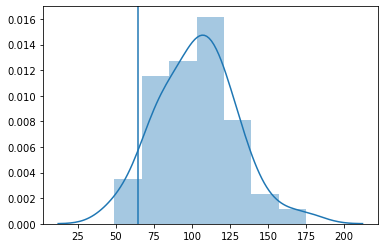

In [36]:
'''H0 = avg >= 100
Ha = avg < 100
alpha = 0.05
n = 48'''
one = stats.norm.ppf(0.05, loc =batteries.mean(), scale=np.std(batteries))
plt.axvline(one,0,1)

# plt.axvline(one,0,0.95)
sns.distplot(stats.norm.rvs(loc= batteries.mean(), scale = np.std(batteries), size=48))


In [43]:
blah = stats.norm.rvs(loc= batteries.mean(), scale = np.std(batteries), size=48)
stats.ttest_1samp(a = blah, popmean = batteries.mean())

Ttest_1sampResult(statistic=0   -0.789819
dtype: float64, pvalue=array([0.43360006]))

#### The file mpg.csv has sample data on the miles per gallon from various US and Japanese cars
#### Test the null hypothesis that the population of US cars has the same MPG as the population of Japanese at the 5% level.

In [33]:
print('H0 - US mpg = Japanese mpg\nHa - US mpg != Japanese mpg\nalpha = 0.05')

H0 - US mpg = Japanese mpg
Ha - US mpg != Japanese mpg
alpha = 0.05


In [32]:
US_mean = np.mean(mpg['American Car MPG'])
Japanese_mean = np.mean(mpg['Japanese Cars MPG'])
print("US mean value:",US_mean)
print("Japanese mean value:",Japanese_mean)

US mean value: 16.025316455696203
Japanese mean value: 30.481012658227847


In [25]:
US_std = np.std(mpg['American Car MPG'])
Japanese_std = np.std(mpg['Japanese Cars MPG'])
print("US std value:",US_std)
print("Japanese std value:",Japanese_std)

US std value: 4.170343407965598
Japanese std value: 6.068930545150857


In [30]:
ttest,pval = stats.ttest_ind(mpg['American Car MPG'],mpg['Japanese Cars MPG'])
print("p-value = ",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value =  3.267637437870519e-38
we reject null hypothesis


US Chart


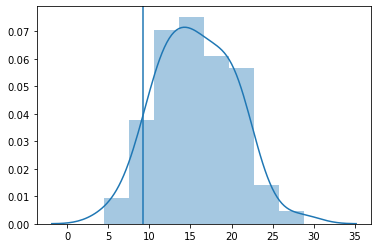

In [40]:
print('US Chart')
US = stats.norm.ppf(0.05, loc =US_mean, scale=US_std)
plt.axvline(US,0,1)

# plt.axvline(one,0,0.95)
sns.distplot(stats.norm.rvs(loc= US_mean, scale = US_std, size=70))


#### The file sat.csv has various data
#### High school math grades (HSM)
#### High school science grades (HSS)
#### High school English grades (HSE)
#### SAT Math (SATM)
#### SAT Verbal (SATV)
#### Gender unknown which is male or female

#### Run a bunch of tests! do gender 1 and gender 2 have the same population means for HSM, HSE, SATM, and SATV?